In [1]:
# Chargement de la base de donnees boston_housing

from keras.datasets import boston_housing

(x_train, y_train),(x_test, y_test) = boston_housing.load_data()

In [2]:
print("La forme d'entrainement est :",x_train.shape)
print("La forme de test est :", x_test.shape)

La forme d'entrainement est : (404, 13)
La forme de test est : (102, 13)


In [3]:
# Normalisons les donnees

mean = x_train.mean(axis = 0)
x_train -= mean
std = x_train.std(axis = 0)
x_train /= std

x_test -= mean
x_test /= std

In [4]:
print("La forme d'entrainement est :",x_train.shape)
print("la forme de test est :",x_test.shape)

La forme d'entrainement est : (404, 13)
la forme de test est : (102, 13)


In [5]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [7]:
# Construction du modele

from keras import models, layers

def construction_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = "relu", input_shape = (x_train.shape[1],)))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer = "rmsprop",
                  loss = "mse",
                  metrics = ["mae"])
    return model

In [8]:
# Validation K-fold

import numpy as np

k = 4
num_echantillons = len(x_train) // k
num_epochs = 100
all_scores = []

In [9]:
# Preparations des donnees d'entrainement et de validation

for i in range (k):
    print("Processus de tri #", i)
    x_val = x_train[i * num_echantillons: (i + 1) * num_echantillons]
    y_val = y_train[i * num_echantillons: (i + 1) * num_echantillons]
    
    partial_x_train = np.concatenate(
        [x_train[:i * num_echantillons],
        x_train[(i + 1) * num_echantillons:]], axis = 0)
    
    partial_y_train = np.concatenate(
        [y_train[:i * num_echantillons],
        y_train[(i + 1) * num_echantillons:]], axis = 0)
    model = construction_model()
    model.summary()
    # Entrainement du modele
    model.fit(partial_x_train, partial_y_train, epochs = num_epochs, batch_size = 1, verbose = 0)
    # Evaluation du modele
    mse, mae = model.evaluate(x_val, y_val, verbose = 0)
    all_scores.append(mae)

Processus de tri # 0


C:\Users\Christian\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Processus de tri # 1


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Processus de tri # 2


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Processus de tri # 3


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Nous appliquons la thecnique K-Fold pour definir notre validation car nous n'avons pas assez de donnees pour prelever une partie de l'ensemble d'entrainement afin de concevoir l'ensemble de validation
all_scores

[2.322815179824829, 2.69695782661438, 2.4477508068084717, 2.236895799636841]

In [11]:
np.mean(all_scores)

2.4261049032211304

In [12]:
# Entrainons notre modele

num_epochs = 500
all_mae_histories = []
for i in range (k):
    print("Precessus de tri #", i)
    x_val = x_train[i * num_echantillons: (i + 1) * num_echantillons]
    y_val = y_train[i * num_echantillons: (i + 1) * num_echantillons]
    
    partial_x_train = np.concatenate(
        [x_train[:i * num_echantillons],
        x_train[(i + 1) * num_echantillons:]], axis = 0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_echantillons],
        y_train[(i + 1) * num_echantillons:]], axis = 0)
    
    model = construction_model()
    history = model.fit(partial_x_train, partial_y_train, validation_data = (x_val, y_val), epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Precessus de tri # 0
Precessus de tri # 1
Precessus de tri # 2
Precessus de tri # 3


In [13]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range (num_epochs)]

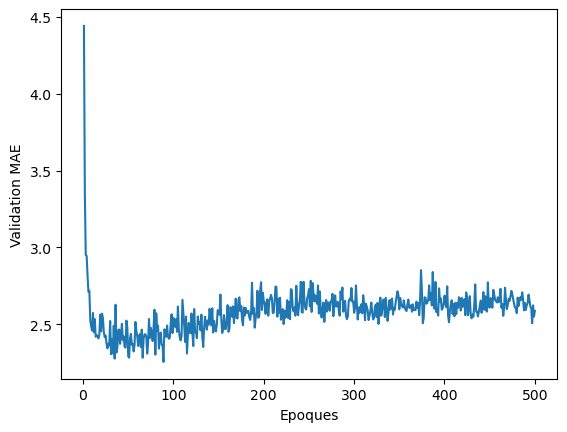

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epoques")
plt.ylabel("Validation MAE")
plt.show()

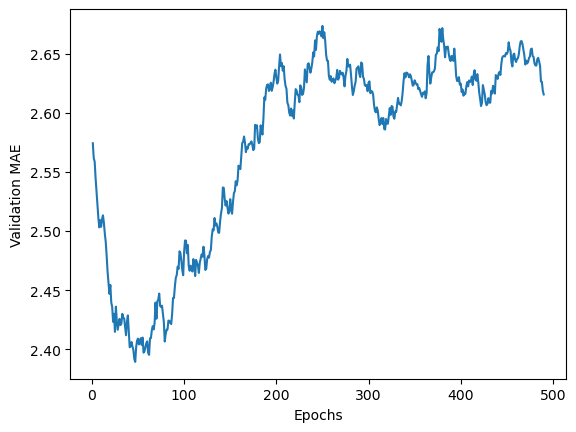

In [15]:
# Lissage de la courbe

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
# Entrainement du model final
model = construction_model()
history = model.fit(x_train, y_train, epochs = 80, batch_size = 1, verbose = 0)
mse_score, mae_score = model.evaluate(x_test, y_test)

C:\Users\Christian\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.4725 - mae: 2.2258 


In [25]:
print("la MAE est :",mae_score)

la MAE est : 2.5129663944244385


In [18]:
history_dict = history.history  
print(history_dict.keys())

dict_keys(['loss', 'mae'])


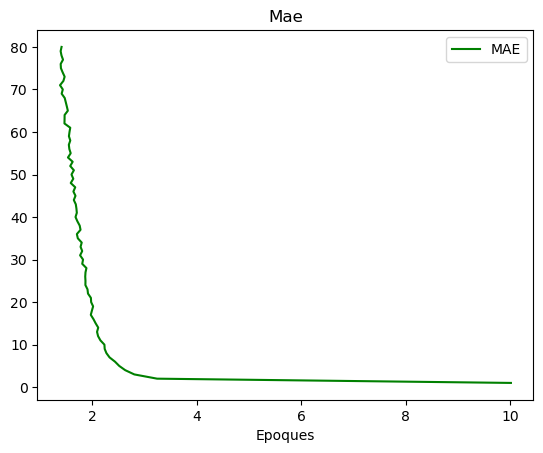

In [19]:
# Affichons la perte et la metrics

loss = history_dict["loss"]
mae = history_dict["mae"]

plt.plot(mae, range(1, len(loss) + 1), "g", label = "MAE")
plt.xlabel("Epoques")
plt.title("Mae")
plt.legend()
plt.show()

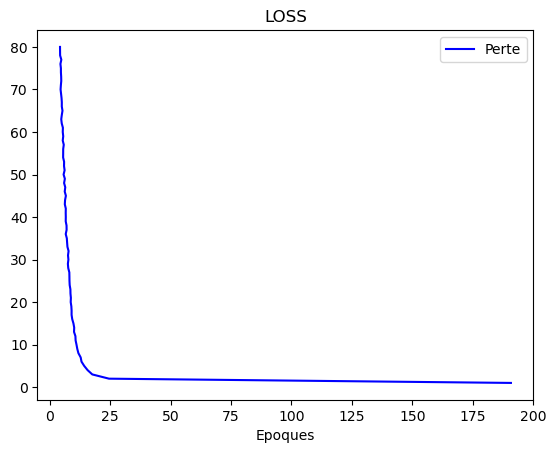

In [20]:
loss = history_dict["loss"]
mae = history_dict["mae"]

plt.plot(loss, range(1, len(loss) + 1), "b", label = "Perte")
plt.xlabel("Epoques")
plt.title("LOSS")
plt.legend()
plt.show()

In [21]:
# Evaluons le model sur notre ensemble de test

predictions = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.4725 - mae: 2.2258


In [22]:
# La perte et la metrics

predictions

[44.20589065551758, 2.5129663944244385]

In [23]:
# Effectuons une prediction sur un nouveau point de donnees

new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 
           15.3, 396.90, 4.98]])
new_data = (new_data - mean)/std

In [24]:
prediction = model.predict(new_data)
print("La prediction du prix de la maison est :", prediction[0][0] * 1000,"Dollar")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
La prediction du prix de la maison est : 23964.28108215332 Dollar
